In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline


In [2]:
coding_times_df=pd.read_csv("data/CodingTimes.csv", header=None)
coding_times_df.columns =['DATE','MINUTES']
coding_times_df['HOURS']=coding_times_df['MINUTES']/60
coding_times_df['YEAR'] = pd.to_datetime(coding_times_df['DATE']).dt.year

coding_times_df.head()
# coding_times_df.sort_values(by=['HOURS'], ascending=False,).head(856)

,DATE,MINUTES,HOURS,YEAR
0,1/1/2018,NaN,NaN,2018
1,1/2/2018,NaN,NaN,2018
2,1/3/2018,NaN,NaN,2018
3,1/4/2018,NaN,NaN,2018
4,1/5/2018,NaN,NaN,2018


In [3]:
hours_coded = coding_times_df['MINUTES'].sum()/60
print("I have coded for:",hours_coded , "hours.")
print("I am", hours_coded/10000*100,"% toward my goal of 10,000 hours.")

I have coded for: 1765.5 hours.
I am 17.655 % toward my goal of 10,000 hours.


In [4]:
time_per_year = coding_times_df.groupby(["YEAR"]).MINUTES.sum().reset_index()
time_per_year['HOURS'] = time_per_year['MINUTES']/60
print(time_per_year)



   YEAR  MINUTES       HOURS
0  2018   5880.0   98.000000
1  2019  21976.0  366.266667
2  2020  41469.0  691.150000
3  2021  19130.0  318.833333
4  2022  17475.0  291.250000


Text(0.5, 0, 'Years')

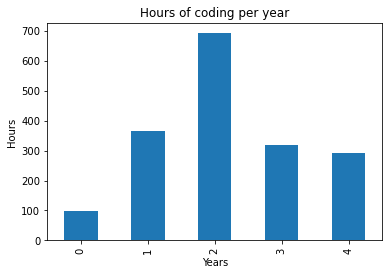

In [5]:
time_per_year['HOURS'].plot(kind="bar", stacked=True)
plt.title("Hours of coding per year")
plt.ylabel("Hours")
plt.xlabel("Years")
#Add xaxis labels


In [6]:
print("Average hours per year: ", time_per_year["HOURS"].mean())

Average hours per year:  353.09999999999997


In [7]:
#Waterfall Chart
yvalues= time_per_year["HOURS"].round(2).append(pd.Series([hours_coded]), ignore_index=True)
fig1  = go.Figure()
fig1.add_trace(go.Waterfall(      

                  x = time_per_year["YEAR"].append(pd.Series(["Total"]), ignore_index=True).astype(str), 
                  y = yvalues,
                  measure = ["relative", "relative","relative",
                             "relative", "relative","total"],
                  base = 0,
                  text = yvalues, textposition = 'inside',      
                  totals = {"marker":{"color":'rgb(47, 103, 234)' }}    
                ))           
fig1.update_yaxes(title = 'Hours')
fig1.update_xaxes(title = 'Years')      
fig1.update_layout(
                   title_text = "Hours of Code Waterfall Chart",
                   title_font = dict(size=25,family='Verdana',
                                     color='darkred'))                 
fig1.show()

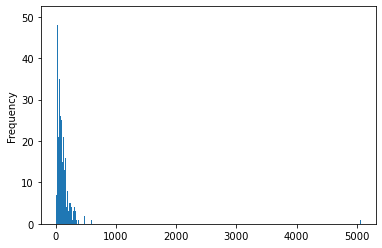

In [18]:
#coding_times_df["MINUTES"].plot.hist(bins=1000)